In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [29]:
df=pd.read_csv('black-friday.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [31]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [32]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [33]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mean())
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mean())

In [34]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [35]:
df.duplicated().sum()

0

In [36]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["City_Category"] = label_encoder.fit_transform(df["City_Category"])
df["City_Category"].unique()

array([0, 2, 1])

In [37]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,0,2,0,3,9.842329,12.668243,8370
1,1000001,P00248942,F,0-17,10,0,2,0,1,6.000000,14.000000,15200
2,1000001,P00087842,F,0-17,10,0,2,0,12,9.842329,12.668243,1422
3,1000001,P00085442,F,0-17,10,0,2,0,12,14.000000,12.668243,1057
4,1000002,P00285442,M,55+,16,2,4+,0,8,9.842329,12.668243,7969


In [38]:
df["Gender"] = label_encoder.fit_transform(df["Gender"])
df["Gender"].unique()

array([0, 1])

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int32  
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int32  
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int32(2), int64(5), object(3)
memory usage: 46.2+ MB


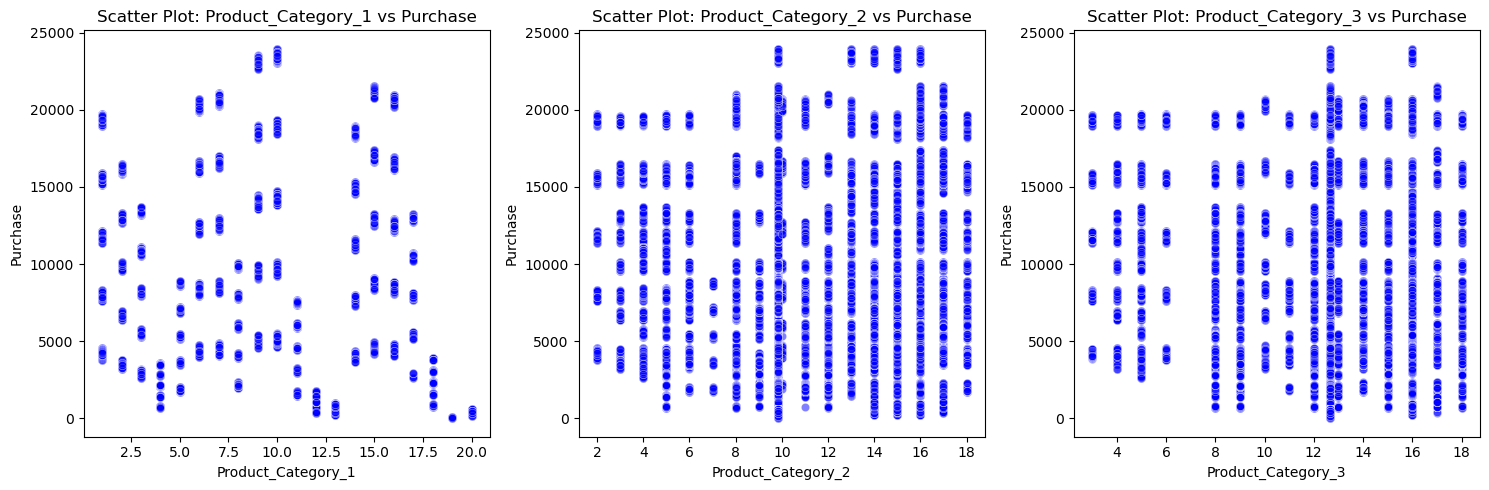

In [42]:
numeric_cols = ['Product_Category_1', 'Product_Category_2', 'Product_Category_3']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=df[col], y=df['Purchase'], alpha=0.5, color='blue')
    plt.title(f"Scatter Plot: {col} vs Purchase")
    plt.xlabel(col)
    plt.ylabel("Purchase")

plt.tight_layout()
plt.show()

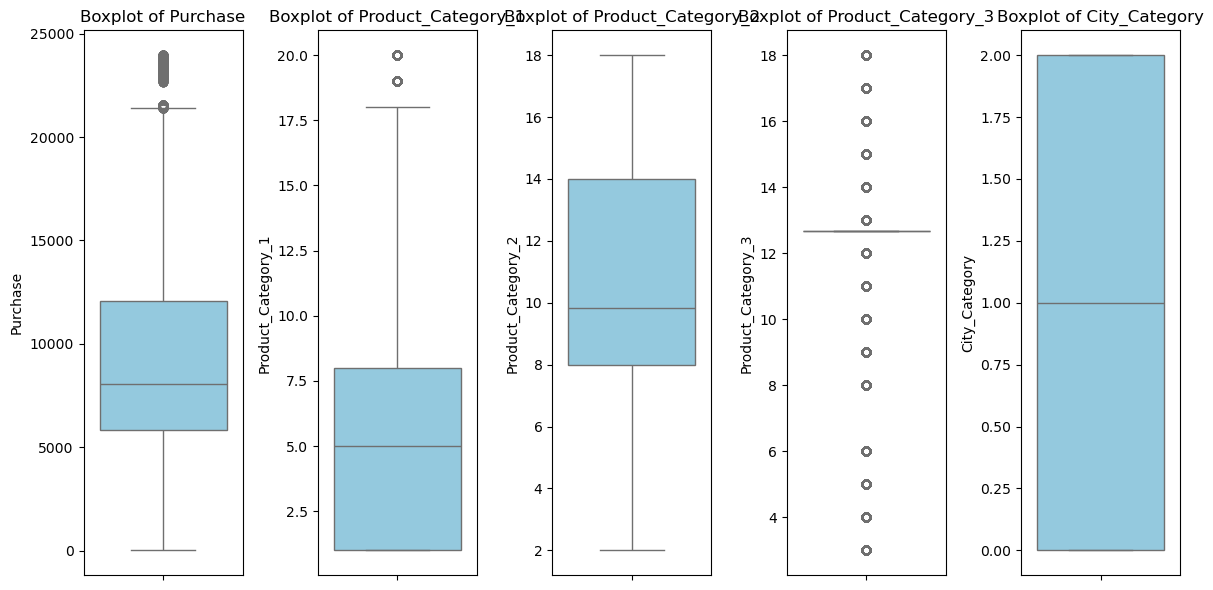

In [45]:
numeric_cols = ['Purchase', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3','City_Category']
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [46]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers
outliers_purchase = detect_outliers(df, 'Purchase')
print(f"Number of outliers in 'Purchase': {len(outliers_purchase)}")


def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
df_cleaned = remove_outliers(df, 'Purchase')
print(f"Rows after removing outliers: {df_cleaned.shape[0]}")

Number of outliers in 'Purchase': 2677
Rows after removing outliers: 547391


In [68]:
df["Gender"] = df["Gender"].map({"F": 0, "M": 1})
df["Age"] = df["Age"].map({"0-17": 0, "18-25": 1, "26-35": 2, "36-45": 3, "46-50": 4, "51-55": 5, "55+": 6})
df["City_Category"] = df["City_Category"].map({"A": 0, "B": 1, "C": 2})
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].replace("4+", 4).astype(int)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      0 non-null       float64
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               0 non-null       float64
 6   Stay_In_Current_City_Years  550068 non-null  int32  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(4), int32(1), int64(6), object(1)
memory usage: 48.3+ MB


In [69]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,NaN,NaN,10,NaN,2,0,3,9.842329,12.668243,8370
1,1000001,P00248942,NaN,NaN,10,NaN,2,0,1,6.000000,14.000000,15200
2,1000001,P00087842,NaN,NaN,10,NaN,2,0,12,9.842329,12.668243,1422
3,1000001,P00085442,NaN,NaN,10,NaN,2,0,12,14.000000,12.668243,1057
4,1000002,P00285442,NaN,NaN,16,NaN,4,0,8,9.842329,12.668243,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,NaN,NaN,13,NaN,1,1,20,9.842329,12.668243,368
550064,1006035,P00375436,NaN,NaN,1,NaN,3,0,20,9.842329,12.668243,371
550065,1006036,P00375436,NaN,NaN,15,NaN,4,1,20,9.842329,12.668243,137
550066,1006038,P00375436,NaN,NaN,1,NaN,2,0,20,9.842329,12.668243,365


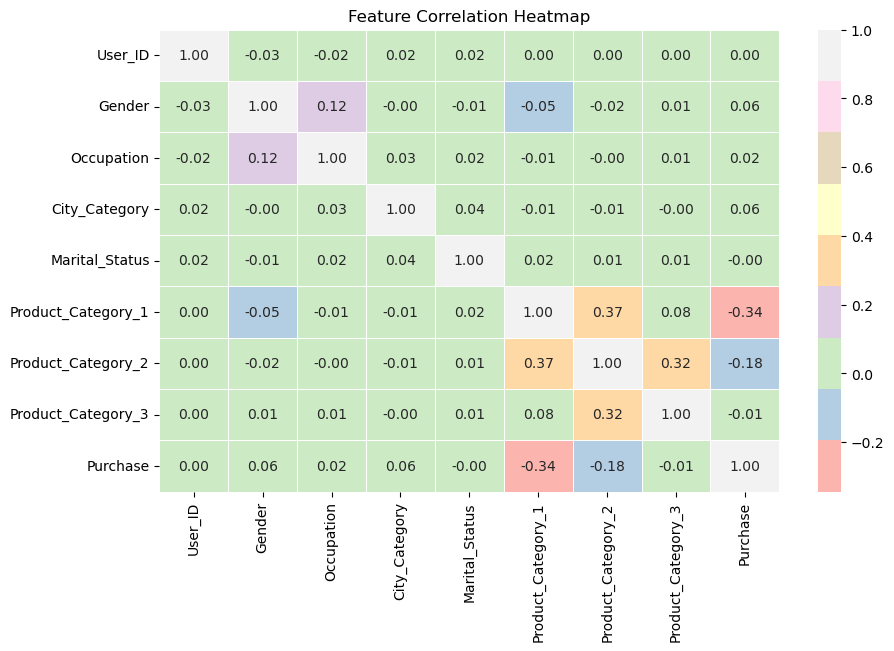

In [49]:
corr_matrix = df.corr(numeric_only=True) 
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Pastel1", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [67]:
x=df.drop(['Purchase','Product_ID'],axis=1)
y=df['Purchase']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,NaN,0,10,NaN,2,0,3,9.842329,12.668243
1,1000001,NaN,0,10,NaN,2,0,1,6.000000,14.000000
2,1000001,NaN,0,10,NaN,2,0,12,9.842329,12.668243
3,1000001,NaN,0,10,NaN,2,0,12,14.000000,12.668243
4,1000002,NaN,6,16,NaN,4,0,8,9.842329,12.668243
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,NaN,5,13,NaN,1,1,20,9.842329,12.668243
550064,1006035,NaN,2,1,NaN,3,0,20,9.842329,12.668243
550065,1006036,NaN,2,15,NaN,4,1,20,9.842329,12.668243
550066,1006038,NaN,6,1,NaN,2,0,20,9.842329,12.668243


In [66]:
model=LinearRegression()
model.fit(x_train,y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values